<a href="https://colab.research.google.com/github/villafue/Progamming/blob/main/SQL/Tutorial/Joining%20Data%20in%20SQL/1%20Introduction%20to%20joins/1_Introduction_to_joins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to joins

In this chapter, you'll be introduced to the concept of joining tables, and will explore the different ways you can enrich your queries using inner joins and self joins. You'll also see how to use the case statement to split up a field into different categories.

## Introduction to INNER JOIN

1. Welcome to the course!

Hi, my name is Chester Ismay and I'll be your instructor for this course on Joining Data in PostgreSQL. As the name suggests, the focus of this course is using SQL to join two or more database tables together into a single table, an essential skill for data scientists. In this chapter, you'll learn about the INNER JOIN, which along with LEFT JOIN are probably the two most common JOINs. You'll see diagrams throughout this course that are designed to help you understand the mechanics of the different joins. Let's begin with a diagram showing the layout of some data and then how an INNER JOIN can be applied to that data.
2. Initial data diagram

In the videos in this chapter and the next, we'll often work with two tables named left and right. You can see that matching values of the id field are colored with the same color. The id field is known as a KEY field since it can be used to reference one table to another. Both the left and right tables also have another field named val. This will be useful in helping you see specifically which records and values are included in each join.
3. INNER JOIN diagram

An INNER JOIN only includes records in which the key is in both tables. You can see here that the id field matches for values of 1 and 4 only. With inner joins we look for matches in the right table corresponding to all entries in the key field in the left table.
4. INNER JOIN diagram (2)

So the focus here shifts to only those records with a match in terms of the id field. The records not of interest to INNER JOIN have been faded.
5. INNER JOIN diagram (3)

Here's a resulting single table from the INNER JOIN clause that gives the val field from the right table with records corresponding to only those with id value of 1 or 4, which are colored as yellow and purple. Now that you have a sense for how INNER JOIN works, let's try an example in SQL.
6. prime_ministers table

The prime_ministers table is one of the tables in the leaders database. It is displayed here. Note the countries that are included. Suppose you were interested in determining nations that have both a prime minister and a president AND putting the results into a single table. Next you'll see the presidents table.
7. presidents table

How did I display all of the prime_ministers table in the previous slide? Recall the use of SELECT and FROM clauses as is shown for the presidents table here. Which countries appear in both tables? With small tables like these, it is easy to notice that Egypt, Portugal, Vietnam, and Haiti appear in both tables. For larger tables, it isn't as simple as just picking these countries out visually. So what does the syntax look like for SQL to get the results of countries with a prime minister and a president from these two tables into one?
8. INNER JOIN in SQL

The syntax for completing an INNER JOIN from the prime_ministers table to the presidents table based on a key field of country is shown. Note the use of aliases for prime_ministers as p1 and presidents as p2. This helps to simplify your code, especially with longer table names like prime_ministers and presidents. A SELECT statement is used to select specific fields from the two tables. In this case, since country exists in both tables, we must write p1 and the period to avoid a SQL error. Next we list the table on the left of the inner join after FROM and then we list the table on the right after INNER JOIN. Lastly, we specify the keys in the two tables that we would like to match on.
9. Let's practice!

You'll now practice applying an inner join to two tables and to three tables. Let's get to it! 

### Inner join

PostgreSQL was mentioned in the slides but you'll find that these joins and the material here applies to different forms of SQL as well.

Throughout this course, you'll be working with the countries database containing information about the most populous world cities as well as country-level economic data, population data, and geographic data. This countries database also contains information on languages spoken in each country.

You can see the different tables in this database by clicking on the tabs on the bottom right below query.sql. Click through them to get a sense for the types of data that each table contains before you continue with the course! Take note of the fields that appear to be shared across the tables.

Recall from the video the basic syntax for an INNER JOIN, here including all columns in both tables:

```
SELECT *
FROM left_table
INNER JOIN right_table
ON left_table.id = right_table.id;
```

You'll start off with a SELECT statement and then build up to an inner join with the cities and countries tables. Let's get to it!

Instructions

1. Begin by selecting all columns from the cities table.

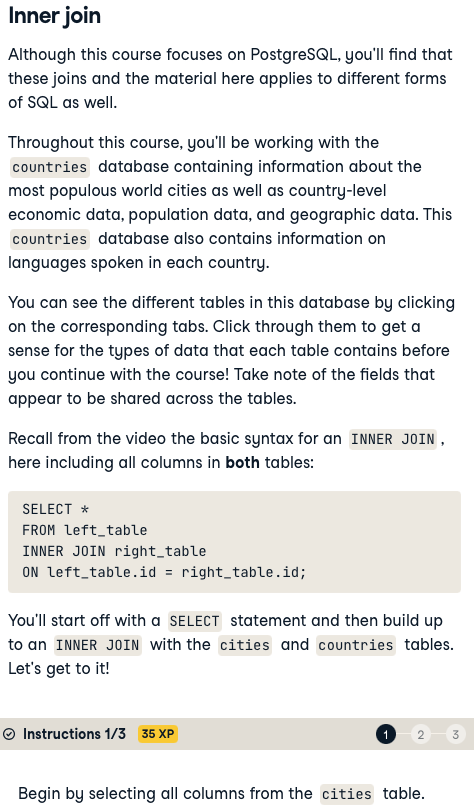

In [ ]:
#-- Select all columns from cities
SELECT *
FROM cities;

'''
name	country_code	city_proper_pop	metroarea_pop	urbanarea_pop
Abidjan	CIV	4765000	null	4765000
Abu Dhabi	ARE	1145000	null	1145000
Abuja	NGA	1235880	6000000	1235880
'''

2. Inner join the cities table on the left to the countries table on the right, keeping all of the fields in both tables.

3. You should match the tables on the country_code field in cities and the code field in countries.

4. Do not alias your tables here or in the next step. Using cities and countries is fine for now.


In [ ]:
SELECT * 
FROM cities
  -- Inner join to countries
  INNER JOIN ___
    -- Match on the country codes
    ON cities.___ = ___.code;

In [ ]:
SELECT * 
FROM cities
 # -- 1. Inner join to countries
  INNER JOIN countries
 #   -- 2. Match on the country codes
    ON cities.country_code = countries.code;

'''
name	country_code	city_proper_pop	metroarea_pop	urbanarea_pop	code	name	continent	region	surface_area	indep_year	local_name	gov_form	capital	cap_long	cap_lat
Abidjan	CIV	4765000	null	4765000	CIV	Cote d'Ivoire	Africa	Western Africa	322463	1960	Cote dIvoire	Republic	Yamoussoukro	-4.0305	5.332
Abu Dhabi	ARE	1145000	null	1145000	ARE	United Arab Emirates	Asia	Middle East	83600	1971	Al-Imarat al-´Arabiya al-Muttahida	Emirate Federation	Abu Dhabi	54.3705	24.4764
Abuja	NGA	1235880	6000000	1235880	NGA	Nigeria	Africa	Western Africa	923768	1960	Nigeria	Federal Republic	Abuja	7.48906	9.05804
'''

5. Modify the SELECT statement to keep only the name of the city, the name of the country, and the name of the region the country resides in.

6. Recall from our [Intro to SQL for Data Science](https://www.datacamp.com/courses/intro-to-sql-for-data-science) course that you can alias fields using AS. Alias the name of the city AS city and the name of the country AS country.


In [ ]:
-- Select name fields (with alias) and region 
SELECT *
FROM cities
  INNER JOIN countries
    ON cities.country_code = countries.code;

In [ ]:
#-- 1. Select name fields (with alias) and region 
SELECT cities.name AS city, countries.name AS country, region
FROM cities
  INNER JOIN countries
    ON cities.country_code = countries.code;

'''
city	country	region
Abidjan	Cote d'Ivoire	Western Africa
Abu Dhabi	United Arab Emirates	Middle East
Abuja	Nigeria	Western Africa
'''

Conclusion

Great work! In the next exercise you'll explore how you can do more aliasing to limit the amount of writing.

### Inner join (2)

Instead of writing the full table name, you can use table aliasing as a shortcut. For tables you also use AS to add the alias immediately after the table name with a space. Check out the aliasing of cities and countries below.

```
SELECT c1.name AS city, c2.name AS country
FROM cities AS c1
INNER JOIN countries AS c2
ON c1.country_code = c2.code;
```

Notice that to select a field in your query that appears in multiple tables, you'll need to identify which table/table alias you're referring to by using a . in your SELECT statement.

You'll now explore a way to get data from both the countries and economies tables to examine the inflation rate for both 2010 and 2015.

Sometimes it's easier to write SQL code out of order: you write the SELECT statement after you've done the JOIN.

Instructions

1. Join the tables countries (left) and economies (right) aliasing countries AS c and economies AS e.

2. Specify the field to match the tables ON.

3. From this join, SELECT:

 * c.code, aliased as country_code.

 * name, year, and inflation_rate, not aliased.


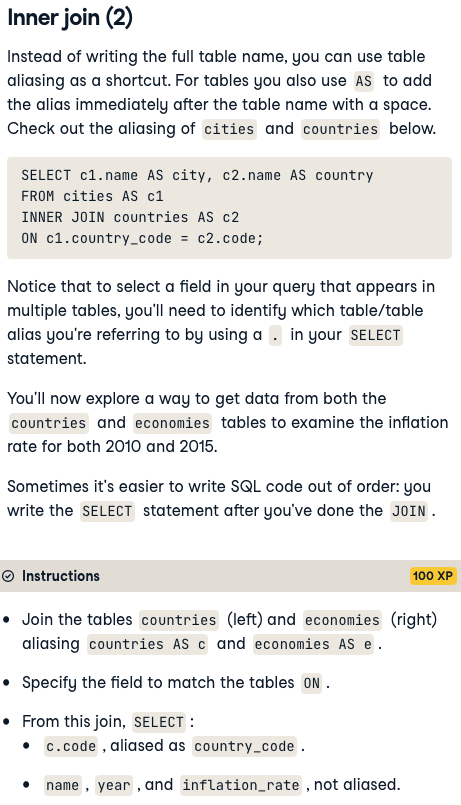

In [ ]:
-- Select fields with aliases
SELECT ___.___ AS ___, ___, ___, ___
FROM countries AS c
  -- Join to economies (alias e)
  ___ JOIN ___ ___ ___
    -- Match on code
    ON ___.___ = ___.___;

In [ ]:
#-- 3. Select fields with aliases
SELECT c.code AS country_code, name, year, inflation_rate
FROM countries AS c
#  -- 1. Join to economies (alias e)
  INNER JOIN economies AS e
#    -- 2. Match on code
    ON c.code = e.code;

'''
country_code	name	year	inflation_rate
AFG	Afghanistan	2010	2.179
AFG	Afghanistan	2015	-1.549
AGO	Angola	2010	14.48
'''

Conclusion

Nicely done! Using this short aliases takes some getting used to, but it will save you a lot of typing.

### Inner join (3)

The ability to combine multiple joins in a single query is a powerful feature of SQL, e.g:

```
SELECT *
FROM left_table
  INNER JOIN right_table
    ON left_table.id = right_table.id
  INNER JOIN another_table
    ON left_table.id = another_table.id;
```

As you can see here it becomes tedious to continually write long table names in joins. This is when it becomes useful to alias each table using the first letter of its name (e.g. countries AS c)! It is standard practice to alias in this way and, if you choose to alias tables or are asked to specifically for an exercise in this course, you should follow this protocol.

Now, for each country, you want to get the country name, its region, and the fertility rate and unemployment rate for both 2010 and 2015.

Note that results should work throughout this course with or without table aliasing unless specified differently.

Instructions

1. Inner join countries (left) and populations (right) on the code and country_code fields respectively.
    
2. Alias countries AS c and populations AS p.

3. Select code, name, and region from countries and also select year and fertility_rate from populations (5 fields in total).


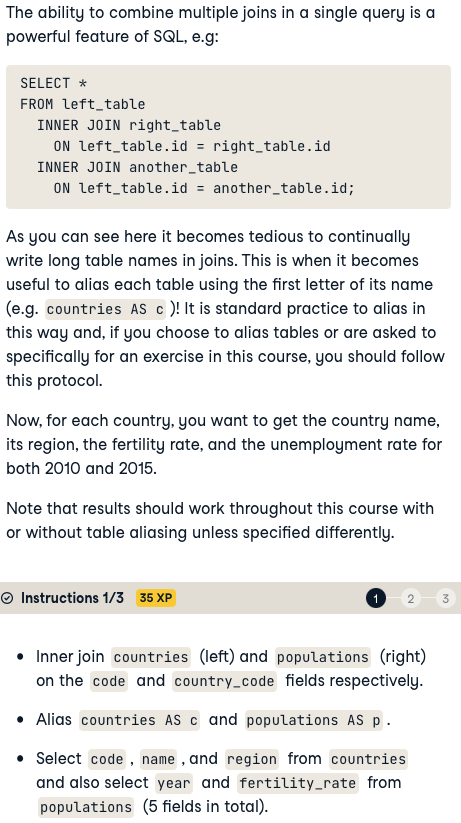

In [ ]:
-- Select fields
___
  -- From countries (alias as c)
  ___
  -- Join with populations (as p)
  ___
    -- Match on country code
    ___

In [ ]:
#-- 4. Select fields
SELECT code, name, region, year, fertility_rate
#  -- 1. From countries (alias as c)
  FROM countries AS c
#  -- 2. Join with populations (as p)
  INNER JOIN populations AS p
#    -- 3. Match on country code
    ON c.code = p.country_code;

'''
code	name	region	year	fertility_rate
ABW	Aruba	Caribbean	2010	1.704
ABW	Aruba	Caribbean	2015	1.647
AFG	Afghanistan	Southern and Central Asia	2010	5.746
'''

4. Add an additional inner join with economies to your previous query by joining on code.

5. Include the unemployment_rate column that became available through joining with economies.

6. Note that year appears in both populations and economies, so you have to explicitly use e.year instead of year as you did before.


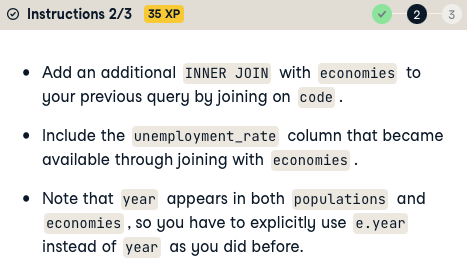

In [ ]:
-- Select fields
SELECT c.code, name, region, year, fertility_rate
  -- From countries (alias as c)
  FROM countries AS c
  -- Join to populations (as p)
  INNER JOIN populations AS p
    -- Match on country code
    ON c.code = p.country_code
  -- Join to economies (as e)
  ___
    -- Match on country code
    ___;

In [ ]:
#-- 6. Select fields
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
#  -- 1. From countries (alias as c)
  FROM countries AS c
#  -- 2. Join to populations (as p)
  INNER JOIN populations AS p
#    -- 3. Match on country code
    ON c.code = p.country_code
#  -- 4. Join to economies (as e)
  INNER JOIN economies AS e
#    -- 5. Match on country code
    ON c.code = e.code;

'''
code	name	region	year	fertility_rate	unemployment_rate
AFG	Afghanistan	Southern and Central Asia	2015	5.746	null
AFG	Afghanistan	Southern and Central Asia	2010	5.746	null
AFG	Afghanistan	Southern and Central Asia	2015	4.653	null
'''

7. Scroll down the query result and take a look at the results for Albania from your previous query. Does something seem off to you?

8. The trouble with doing your last join on c.code = e.code and not also including year is that e.g. the 2010 value for fertility_rate is also paired with the 2015 value for unemployment_rate.

9. Fix your previous query: in your last ON clause, use AND to add an additional joining condition. In addition to joining on code in c and e, also join on year in e and p.


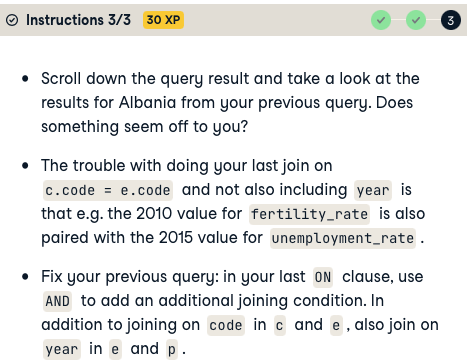

In [ ]:
-- Select fields
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
  -- From countries (alias as c)
  FROM countries AS c
  -- Join to populations (as p)
  INNER JOIN populations AS p
    -- Match on country code
    ON c.code = p.country_code
  -- Join to economies (as e)
  INNER JOIN economies AS e
    -- Match on country code and year
    ___;

In [ ]:
#-- 6. Select fields
SELECT c.code, name, region, e.year, fertility_rate, unemployment_rate
 # -- 1. From countries (alias as c)
  FROM countries AS c
#  -- 2. Join to populations (as p)
  INNER JOIN populations AS p
 #   -- 3. Match on country code
    ON c.code = p.country_code
 # -- 4. Join to economies (as e)
  INNER JOIN economies AS e
 #   -- 5. Match on country code and year
    ON c.code = e.code AND e.year = p.year;

'''
code	name	region	year	fertility_rate	unemployment_rate
AFG	Afghanistan	Southern and Central Asia	2010	5.746	null
AFG	Afghanistan	Southern and Central Asia	2015	4.653	null
AGO	Angola	Central Africa	2010	6.416	null
'''

Conclusion

Good work! Time to learn something new!

## INNER JOIN via USING

1. INNER JOIN via USING

Congratulations on making it through the first set of exercises on using INNER JOIN to combine two or three tables into one! You'll next learn about the USING keyword in SQL and how it can be used in joins.
2. The INNER JOIN diagram again

Recall the INNER JOIN diagram you saw in the last video. Think about the SQL code needed to complete this diagram. Let's check it out. We select and alias three fields and use the left table on the left of the join and the right table on the right of the join matching based on the entries for the id key field.
3. The INNER JOIN diagram with USING

When the key field you'd like to join on is the same name in both tables, you can use a USING clause instead of the ON clause you have seen so far. Since id is the same name in both the left table and the right table we can specify USING instead of ON here. Note that the parentheses are required around the key field with USING. Let's revisit the example of joining the prime_ministers table
4. Countries with prime ministers and presidents

to the presidents table to determine countries with both types of leaders. How could you fill in the blanks to get the result with USING? (Pause for a few seconds) Did you get it? (PAUSE) Ah, I played a bit of a trick on you here. But why does this work? Since an INNER JOIN includes entries in both tables and both tables contain the countries listed, it doesn't matter the order in which we place the tables in the join if we SELECT these columns. You'll be told in the exercises which table to use on the left and on the right to avoid this confusion. Note again the use of the parentheses around country after USING.
5. Let's practice!

Now you'll test your understanding of INNER JOINs before we delve into an exercise with USING. Go get 'em! 

### Review inner join using on

Why does the following code result in an error?

```
SELECT c.name AS country, l.name AS language
FROM countries AS c
  INNER JOIN languages AS l;
```

Possible Answers

1. The languages table has more rows than the countries table.
 - Incorrect. It is not a requirement that the table on the right of the JOIN have fewer rows than the one on the left.

2. There are multiple languages spoken in many countries.
 - Incorrect. When an INNER JOIN is done, it will match all values in both tables. This may mean that there are multiple matches for a country in terms of languages spoken.

3. INNER JOIN requires a specification of the key field (or fields) in each table.
 - Correct!

4. Join queries may not be followed by a semi-colon.
 - Incorrect. Review your previous exercises to make sure all of the code needed for an INNER JOIN.

### Inner join with using

When joining tables with a common field name, e.g.

```
SELECT *
FROM countries
  INNER JOIN economies
    ON countries.code = economies.code
```

You can use USING as a shortcut:

```
SELECT *
FROM countries
  INNER JOIN economies
    USING(code)
```

You'll now explore how this can be done with the countries and languages tables.

Instructions

1. Inner join countries on the left and languages on the right with USING(code).
    
2. Select the fields corresponding to:

 * country name AS country,

 * continent name,

 * language name AS language, and

 * whether or not the language is official.

Remember to alias your tables using the first letter of their names.

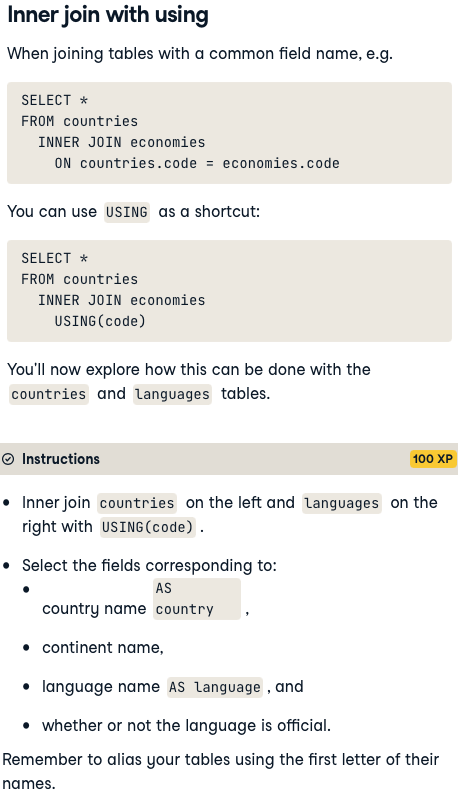

In [ ]:
-- Select fields
___
  -- From countries (alias as c)
  ___
  -- Join to languages (as l)
  ___
    -- Match using code
    ___

In [ ]:
#-- 4. Select fields
SELECT c.name AS country, c.continent, l.name AS language, l.official
#  -- 1. From countries (alias as c)
  FROM countries AS c
#  -- 2. Join to languages (as l)
  INNER JOIN languages AS l
#    -- 3. Match using code
    USING(code)

'''
country	continent	language	official
Afghanistan	Asia	Dari	true
Afghanistan	Asia	Pashto	true
Afghanistan	Asia	Turkic	false
'''

## Self-ish joins, just in CASE

1. Self-ish joins, just in CASE

You'll now dive into inner joins where a table is joined with itself. Sounds a little selfish, doesn't it? These types of joins, as you may have guessed, are called self joins. You'll also explore how to slice a numerical field into categories using the CASE command. Joining a table to
2. Join a table to itself?

itself may seem like a bit of a crazy, strange thing to ever want to do. Self-joins are used to compare values in a field to other values of the same field from within the same table. Let's further explore this with an example. Recall the prime_ministers table from earlier. What if you wanted to create a new table showing countries that are in the same continent matched as pairs? Let's explore a chunk of INNER JOIN code using the prime_ministers table.
3. Join prime_ministers to itself?

You might want to pause the video and think about what the resulting table will look like. The country column is selected twice as well as continent. The prime_ministers table is on both the left and the right. The vital step here is setting the key columns by which we match the table to itself. For each country, we will have a match if the country in the "right table" (that is also prime_ministers) is in the same continent. Lastly, since the results of this query are more than can fit on the slide, you'll only see the first 14 records. See how we have exactly this in the result! It's a pairing of each country with every other country in its same continent. But do you see a problem here? We don't want to list the country with itself after all. In the next slide, you'll see a way to do this. Pause to think about how to get around this before continuing. We don't want to include rows
4. Finishing off the self-join on prime_ministers

where the country is the same in the country1 and country2 fields. The AND clause can check that multiple conditions are met. Here a match will not be made between prime_ministers and itself if the countries match. You, thus, have the correct table now; the results here are again limited in order for them to fit on the slide. Notice that self-join doesn't have a syntax quite as simple as INNER JOIN (You can't just write SELF JOIN in SQL code).
5. CASE WHEN and THEN

The next command isn't a join, but is a useful tool in your repertoire. You'll be introduced to using CASE with another table in the leaders database. The states table contains numeric data about different countries in the six inhabited world continents. We'll focus on the field indep_year now. Suppose we'd like to group the year of independence into categories of before 1900, between 1900 and 1930, and after 1930. CASE will get us there! CASE is a way to do multiple if-then-else statements in a simplified way in SQL.
6. Preparing indep_year_group in states

You can now see the basic layout for creating a new field containing the groupings. How might we fill them in? After the first WHEN should specify that we want to check for indep_year being less than 1900. Next we want indep_year_group to contain 'between 1900 and 1930' in the next blank. Lastly any other record not matching these conditions will be assigned the value of 'after 1930' for indep_year_group.
7. Creating indep_year_group in states

Check out the completed query with completed blanks. Notice how the values of indep_year are grouped in indep_year_group. Also observe how continent relates to indep_year_group.
8. Let's practice!

You'll now work on a couple of exercises for practice, then complete a challenge testing your knowledge of the Chapter 1 material. 

### Self-join

In this exercise, you'll use the populations table to perform a self-join to calculate the percentage increase in population from 2010 to 2015 for each country code!

Since you'll be joining the populations table to itself, you can alias populations as p1 and also populations as p2. This is good practice whenever you are aliasing and your tables have the same first letter. Note that you are required to alias the tables with self-joins.

Instructions

1. Join populations with itself ON country_code.

2. Select the country_code from p1 and the size field from both p1 and p2. SQL won't allow same-named fields, so alias p1.size as size2010 and p2.size as size2015.


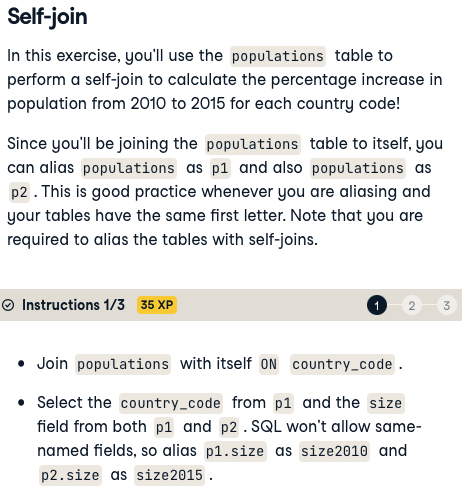

In [ ]:
-- Select fields with aliases
___
___
___
-- From populations (alias as p1)
___
  -- Join to itself (alias as p2)
  ___
    -- Match on country code
    ___

In [ ]:
#-- 4. Select fields with aliases
SELECT p1.country_code, 
       p1.size AS size2010, 
       p2.size AS size2015
#-- 1. From populations (alias as p1)
FROM populations as p1
#  -- 2. Join to itself (alias as p2)
  INNER JOIN populations as p2
#    -- 3. Match on country code
    ON p1.country_code = p2.country_code

'''
country_code	size2010	size2015
ABW	101597	103889
ABW	101597	101597
ABW	103889	103889
'''

Notice from the result that for each country_code you have four entries laying out all combinations of 2010 and 2015.

3. Extend the ON in your query to include only those records where the p1.year (2010) matches with p2.year - 5 (2015 - 5 = 2010). This will omit the three entries per country_code that you aren't interested in.


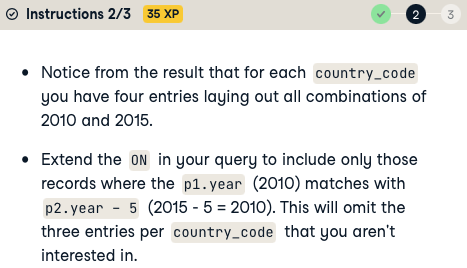

In [ ]:
-- Select fields with aliases
SELECT p1.country_code,
       p1.size AS size2010,
       p2.size AS size2015
-- From populations (alias as p1)
FROM ___ as p1
  -- Join to itself (alias as p2)
  ___ JOIN ___ as p2
    -- Match on country code
    ON ___.___ = ___.___
        -- and year (with calculation)
        ___

In [ ]:
#-- 5. Select fields with aliases
SELECT p1.country_code,
       p1.size AS size2010,
       p2.size AS size2015
#-- 1. From populations (alias as p1)
FROM populations as p1
#  -- 2. Join to itself (alias as p2)
  INNER JOIN populations as p2
#    -- 3. Match on country code
    ON p1.country_code = p2.country_code
#        -- 4. and year (with calculation)
        AND p1.year = p2.year - 5

'''
country_code	size2010	size2015
ABW	101597	103889
AFG	27962200	32526600
AGO	21220000	25022000
'''

As you just saw, you can also use SQL to calculate values like p2.year - 5 for you. With two fields like size2010 and size2015, you may want to determine the percentage increase from one field to the next:

With two numeric fields `A` and `B`, the percentage growth from `A` to `B` can be calculated as `(B - A) / A * 100.0`.

Add a new field to SELECT, aliased as growth_perc, that calculates the percentage population growth from 2010 to 2015 for each country, using p2.size and p1.size.

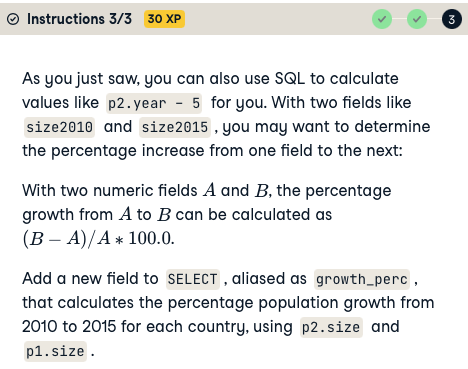

In [ ]:
-- Select fields with aliases
SELECT p1.country_code,
       p1.size AS size2010, 
       p2.size AS size2015,
       -- Calculate growth_perc
       ((___.___ - ___.___)/___.___ * 100.0) AS ___
-- From populations (alias as p1)
FROM populations AS ___
  -- Join to itself (alias as p2)
  INNER JOIN populations AS ___
    -- Match on country code
    ON p1.country_code = p2.country_code
        -- and year (with calculation)
        AND p1.___ = p2.___ - 5;

In [ ]:
SELECT p1.country_code,
       p1.size AS size2010, 
       p2.size AS size2015,
       -- 1. calculate growth_perc
       ((p2.size - p1.size)/p1.size * 100.0) AS growth_perc
-- 2. From populations (alias as p1)
FROM populations AS p1
  -- 3. Join to itself (alias as p2)
  INNER JOIN populations AS p2
    -- 4. Match on country code
    ON p1.country_code = p2.country_code
        -- 5. and year (with calculation)
        AND p1.year = p2.year - 5;

'''
country_code	size2010	size2015	growth_perc
ABW	101597	103889	2.25597210228443
AFG	27962200	32526600	16.32329672575
AGO	21220000	25022000	17.9171919822693
'''

### Case when and then

Often it's useful to look at a numerical field not as raw data, but instead as being in different categories or groups.

You can use CASE with WHEN, THEN, ELSE, and END to define a new grouping field.

Instructions

Using the countries table, create a new field AS geosize_group that groups the countries into three groups:

1. If surface_area is greater than 2 million, geosize_group is 'large'.

2. If surface_area is greater than 350 thousand but not larger than 2 million, geosize_group is 'medium'.

3. Otherwise, geosize_group is 'small'.


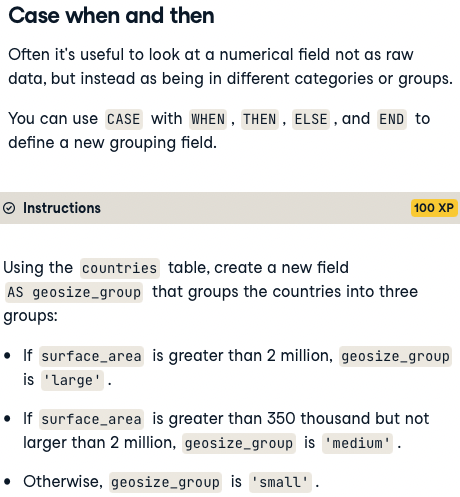

In [ ]:
SELECT name, continent, code, surface_area,
    -- First case
    CASE WHEN ___ > ___ THEN '___'
        -- Second case
        WHEN ___ > ___ THEN ___
        -- Else clause + end
        ELSE ___ END
        -- Alias name
        AS ___
-- From table
FROM ___;

In [ ]:
SELECT name, continent, code, surface_area,
    -- 1. First case
    CASE WHEN surface_area > 2000000 THEN 'large'
        -- 2. Second case
        WHEN surface_area > 350000 THEN 'medium'
        -- 3. Else clause + end
        ELSE 'small' END
        -- 4. Alias name
        AS geosize_group
-- 5. From table
FROM countries;

'''
name	continent	code	surface_area	geosize_group
Afghanistan	Asia	AFG	652090	medium
Netherlands	Europe	NLD	41526	small
Albania	Europe	ALB	28748	small
'''

### Inner challenge

The table you created with the added geosize_group field has been loaded for you here with the name countries_plus. Observe the use of (and the placement of) the INTO command to create this countries_plus table:

```
SELECT name, continent, code, surface_area,
    CASE WHEN surface_area > 2000000
            THEN 'large'
       WHEN surface_area > 350000
            THEN 'medium'
       ELSE 'small' END
       AS geosize_group
INTO countries_plus
FROM countries;
```

You will now explore the relationship between the size of a country in terms of surface area and in terms of population using grouping fields created with CASE.

By the end of this exercise, you'll be writing two queries back-to-back in a single script. You got this!

Instructions

Using the populations table focused only for the year 2015, create a new field aliased as popsize_group to organize population size into

1. 'large' (> 50 million),

2. 'medium' (> 1 million), and

3. 'small' groups.

Select only the country code, population size, and this new popsize_group as fields.

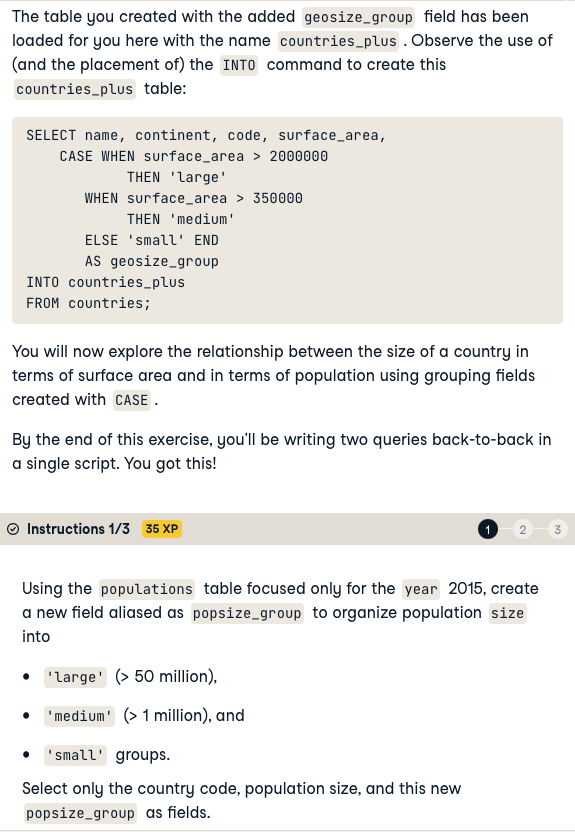

In [ ]:
SELECT country_code, size,
    -- First case
    CASE WHEN ___ > ___ THEN ___
        -- Second case
        WHEN ___ > ___ THEN ___
        -- Else clause + end
        ELSE ___ END
        -- Alias name (popsize_group)
        AS ___
-- From table
FROM ___
-- Focus on 2015
WHERE ___ = ___;

In [ ]:
SELECT country_code, size,
    -- 1. First case
    CASE WHEN size > 50000000 THEN 'large'
        -- 2. Second case
        WHEN size > 1000000 THEN 'medium'
        -- 3. Else clause + end
        ELSE 'small' END
        -- 4. Alias name (popsize_group)
        AS popsize_group
-- 5. From table
FROM populations
-- 6. Focus on 2015
WHERE year = 2015;

'''
country_code	size	popsize_group
ABW	103889	small
AFG	32526600	medium
AGO	25022000	medium
'''

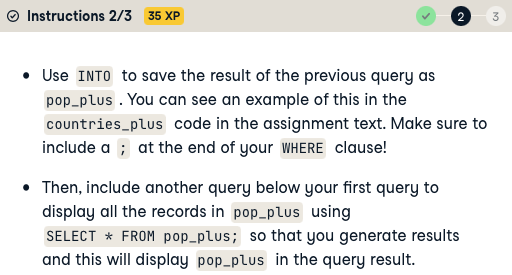

4. Use INTO to save the result of the previous query as pop_plus. You can see an example of this in the countries_plus code in the assignment text. Make sure to include a ; at the end of your WHERE clause!

5. Then, include another query below your first query to display all the records in pop_plus using SELECT * FROM pop_plus; so that you generate results and this will display pop_plus in query result.


In [ ]:
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
-- Into table
___
FROM populations
WHERE year = 2015;

-- Select all columns of pop_plus
___

In [ ]:
SELECT country_code, size,
    CASE WHEN size > 50000000 THEN 'large'
        WHEN size > 1000000 THEN 'medium'
        ELSE 'small' END
        AS popsize_group
-- 1. Into table
INTO pop_plus
FROM populations
WHERE year = 2015;

-- 2. Select all columns of pop_plus
SELECT * FROM pop_plus;

'''
country_code	size	popsize_group
ABW	103889	small
AFG	32526600	medium
AGO	25022000	medium
'''

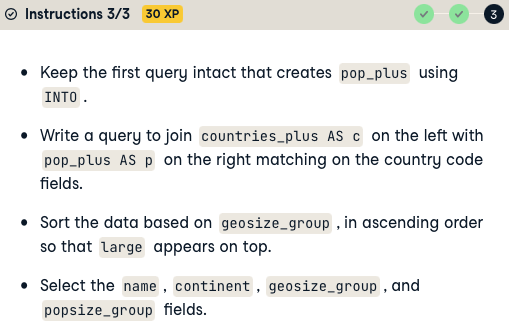

6. Keep the first query intact that creates pop_plus using INTO.

7. Write a query to join countries_plus AS c on the left with pop_plus AS p on the right matching on the country code fields.

8. Sort the data based on geosize_group, in ascending order so that large appears on top.

9. Select the name, continent, geosize_group, and popsize_group fields.


In [ ]:
SELECT country_code, size,
  CASE WHEN size > 50000000
            THEN 'large'
       WHEN size > 1000000
            THEN 'medium'
       ELSE 'small' END
       AS popsize_group
INTO pop_plus       
FROM populations
WHERE year = 2015;

-- Select fields
___
-- From countries_plus (alias as c)
___
  -- Join to pop_plus (alias as p)
  ___
    -- Match on country code
    ___
-- Order the table    
___;

In [ ]:
SELECT country_code, size,
  CASE WHEN size > 50000000
            THEN 'large'
       WHEN size > 1000000
            THEN 'medium'
       ELSE 'small' END
       AS popsize_group
INTO pop_plus       
FROM populations
WHERE year = 2015;

-- 5. Select fields
SELECT c.name, c.continent, c.geosize_group, p.popsize_group
-- 1. From countries_plus (alias as c)
FROM countries_plus AS c
  -- 2. Join to pop_plus (alias as p)
  INNER JOIN pop_plus as p
    -- 3. Match on country code
    ON c.code = p.country_code
-- 4. Order the table    
ORDER BY geosize_group;

'''
name	continent	geosize_group	popsize_group
Canada	North America	large	medium
United States	North America	large	large
Greenland	North America	large	small
'''

Conclusion

This concludes chapter 1 and you now know the INs of JOINs. Off to chapter 2 to learn the OUTs!